In [30]:
# Libraries needed to run the code
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns


#### Creation of Knowledge Base using the generated sequential rules 
The rules mined in the previous step are contained in 'sequential_rules_final.csv'.

They consist of two parts: antecedent and consequent. Utilizing these rules as a Knowledge Base, these parts are seen as prerequisites and outcomes, respectively. 

The code below reads 'sequential_rules_final.csv' and creates a Knowledge Base from them, keeping the rules which have at least one lab test in the outcome.

In [41]:
df = pd.read_csv('sequential_rules_final.csv')
df = df[df['rule'].str.contains('lab')]

In [32]:
df[['prerequisite', 'outcome']] = df['rule'].str.split(' => ', expand=True)
df['prerequisite'] = df['prerequisite'].str.replace(r'[<{>\]}]', '', regex=True)
df['outcome'] = df['outcome'].str.replace(r'[<{>\]}]', '', regex=True)
df = df[~df['outcome'].str.contains('pha')]


#### MinSup parameter

The code below filters and plot the support values for all rules and assists in the selection of MinSup paremeter.

The visualization indicates that a support value of 15% is the optimal threshold, providing a sufficient
number of sequential rules while limiting the overwhelming number of trivial rules, thereby
making the process faste

In [47]:
lines =  [15, 20, 25, 30, 35, 40, 45] 
rules_stat = dict()
rules_stat[10] = 31711
for line in lines:
    filtered_df = df[(df['support'] *100 >= line)]
    rules_stat[line] = len(filtered_df)

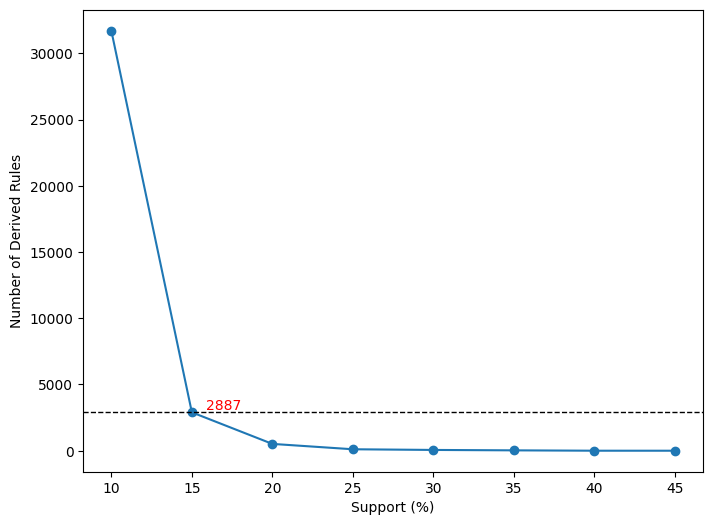

In [48]:
labels = list(rules_stat.keys()) 
values = list(rules_stat.values())

plt.figure(figsize=(8, 6))
plt.plot(labels, values, marker='o', linestyle='-')
plt.axhline(y=2887, color='k', linestyle='--', linewidth=1)

plt.xlabel('Support (%)')
plt.ylabel('Number of Derived Rules')

# Adding the number of rules with the given threshold 15%
plt.text(17, 3400, '2887', color='red',ha='center', va='center', fontsize=10)

# Comment out if you want to save this file
#plt.savefig('support_values.pdf')
plt.show()

#### MinConf parameter

The code below plot the confidence values for all rules and assists in the selection of MinSup paremeter.

It shows that 97.2% of the sequential rules have more than 60% confidence. This value was selected
as the threshold, ensuring an appropriate level of confidence without losing many derived rules.


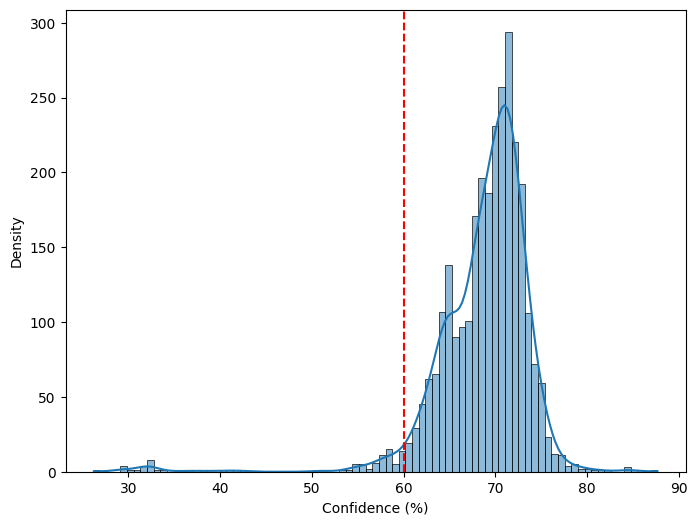

In [49]:
confidence_values = df['confidence'] * 100

plt.figure(figsize=(8, 6))

sns.histplot(confidence_values, kde=True)

# Adding the vertical line at the 60% to show the threshold
plt.axvline(60, color='red', linestyle='--')

# Comment out if you want to have a title
#plt.title('Distribution of Confidence Values')
plt.xlabel('Confidence (%)')
plt.ylabel('Density')

# Comment out if you want to save this file
#plt.savefig('confidence.pdf')
plt.show()

In [44]:
conf_rules = (confidence_values>60).sum()/len(confidence_values)
print(round(100 *conf_rules,1))


97.2


#### The best rules

The code below reports  the top five rules of each length based on the highest lift. 
Additionally, the support and confidence for each rule are also provided. 

If you want to save these results just comment out the last line of the code.

In [39]:
df['len'] = df['rule'].str.count('{')
top_5_rules = df.groupby('len').apply(lambda x: x.nlargest(5, 'lift')).reset_index(drop=True)
top_5_rules
#Comment out if you want to save the best rules
#top_5_rules.to_csv('rules_to_report.csv')

,rule,support,confidence,lift,prerequisite,outcome,len
0,<{lab_32693-4}> => <{lab_50676-6}>,0.160972,0.820488,1.552874,lab_32693-4,lab_50676-6,2
1,<{pha_00096}> => <{lab_50676-6}>,0.153656,0.784479,1.484724,pha_00096,lab_50676-6,2
2,<{pha_00003}> => <{lab_19123-9}>,0.179338,0.683207,1.479648,pha_00003,lab_19123-9,2
3,<{lab_32693-4}> => <{lab_1963-8}>,0.155986,0.795076,1.466577,lab_32693-4,lab_1963-8,2
4,<{lab_32693-4}> => <{lab_70219-1}>,0.171982,0.876610,1.457191,lab_32693-4,lab_70219-1,2
5,"<{lab_19123-9},{lab_19123-9}> => <{lab_19123-9}>",0.192971,0.673089,1.457735,"lab_19123-9,lab_19123-9",lab_19123-9,3
6,"<{lab_50676-6},{basket_00009}> => <{lab_50676-6}>",0.160700,0.760707,1.439731,"lab_50676-6,basket_00009",lab_50676-6,3
7,"<{lab_1963-8},{lab_19123-9}> => <{lab_19123-9}>",0.203970,0.663068,1.436031,"lab_1963-8,lab_19123-9",lab_19123-9,3
8,"<{lab_2075-0},{lab_19123-9}> => <{lab_19123-9}>",0.205820,0.662419,1.434626,"lab_2075-0,lab_19123-9",lab_19123-9,3
9,"<{lab_34548-8},{lab_19123-9}> => <{lab_19123-9}>",0.205444,0.659833,1.429027,"lab_34548-8,lab_19123-9",lab_19123-9,3
